In [1]:
import sys

sys.path.append(
    "/Users/varunpathak/Documents/personal_projects/kaggle_data_projects/iris_classifing/"
)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as subplots
from data import gatherData
from model import modelTraining
from utils import load_config_file

In [3]:
config = load_config_file("config.yaml")

## Data gathering 

In [4]:
gather_data = gatherData()
master_data = gather_data.load_data()
master_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## visualization

/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/2100372149.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


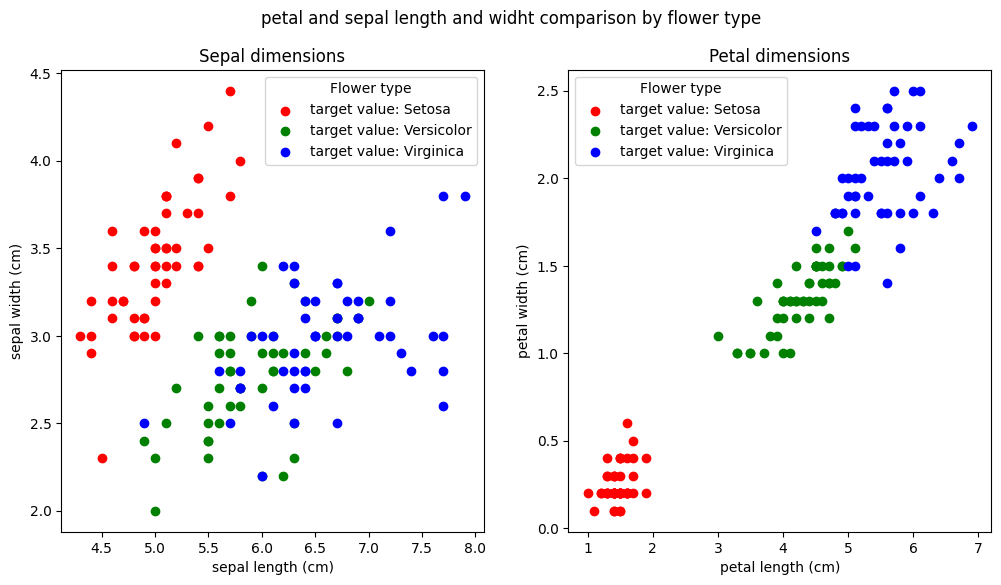

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("petal and sepal length and widht comparison by flower type")

color_values = {0: "red", 1: "green", 2: "blue"}
target_name = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

for target_value in master_data["target"].unique():

    subset = master_data[master_data["target"] == target_value]
    ax1.scatter(
        x=subset["sepal length (cm)"],
        y=subset["sepal width (cm)"],
        label=f"target value: {target_name[target_value]}",
        c=color_values[target_value],
    )

ax1.set_xlabel("sepal length (cm)")
ax1.set_ylabel("sepal width (cm)")
ax1.set_title("Sepal dimensions")
ax1.legend(title="Flower type")

for target_value in master_data["target"].unique():

    subset = master_data[master_data["target"] == target_value]
    ax2.scatter(
        x=subset["petal length (cm)"],
        y=subset["petal width (cm)"],
        label=f"target value: {target_name[target_value]}",
        c=color_values[target_value],
    )

ax2.set_xlabel("petal length (cm)")
ax2.set_ylabel("petal width (cm)")

ax2.set_title("Petal dimensions")
ax2.legend(title="Flower type")


fig.show()

In [7]:
fig = subplots.make_subplots(
    rows=1, cols=2, subplot_titles=("Sepal dimensions", "petal dimensions")
)

color_values = {0: "red", 1: "green", 2: "blue"}
target_name = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}


for target_val in master_data["target"].unique():

    subset = master_data[master_data["target"] == target_val]

    fig.add_trace(
        go.Scatter(
            x=subset["sepal length (cm)"],
            y=subset["sepal width (cm)"],
            name=target_name[target_val],
            mode="markers",
            marker=dict(color=color_values[target_val]),
        ),
        row=1,
        col=1,
    )

for target_val in master_data["target"].unique():

    subset = master_data[master_data["target"] == target_val]

    fig.add_trace(
        go.Scatter(
            x=subset["petal length (cm)"],
            y=subset["petal width (cm)"],
            name=target_name[target_val],
            mode="markers",
            marker=dict(color=color_values[target_val]),
        ),
        row=1,
        col=2,
    )


fig.update_layout(
    title="petal and sepal length and widht comparison by flower type",
    xaxis_title="sepal length (cm)",
    yaxis_title="sepal width (cm)",
    xaxis2_title="petal length (cm)",
    yaxis2_title="petal width (cm)",
    showlegend=True,
    legend_title_text="Flower type",
)

In [8]:
df_count_target = master_data["target"].value_counts().reset_index()
df_count_target

,target,count
0,0,50
1,1,50
2,2,50


In [9]:
df_count_target["target"] = df_count_target["target"].replace(target_name)
df_count_target

,target,count
0,Setosa,50
1,Versicolor,50
2,Virginica,50


/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/1054009881.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



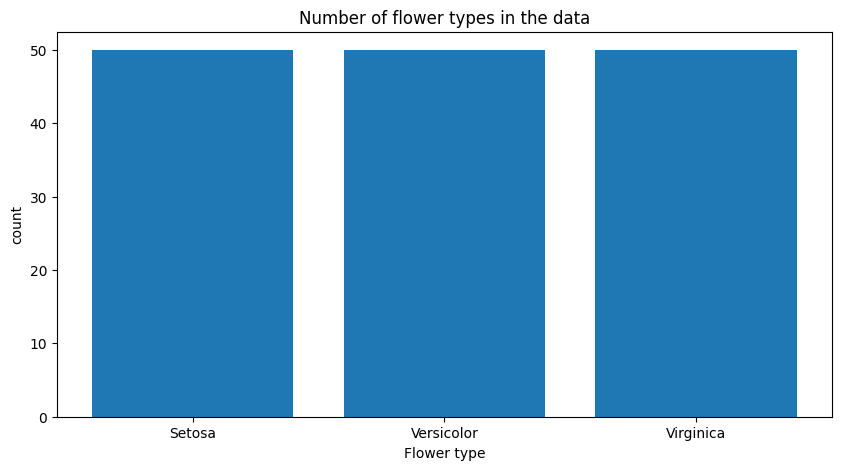

In [10]:
fig = plt.figure(figsize=(10, 5))

plt.bar(df_count_target["target"], df_count_target["count"])
plt.title("Number of flower types in the data")
plt.xlabel("Flower type")
plt.ylabel("count")
fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_count_target["target"],
        y=df_count_target["count"],
        name="count for flower types",
    )
)


fig.update_layout(
    title="Number of flower types in the data",
    xaxis_title="Flower type",
    yaxis_title="count",
    height=500,
    width=500,
)

In [12]:
master_data["target_str"] = master_data["target"].replace(target_name)

In [13]:

features_list = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
]


for feature in features_list:

    fig = go.Figure()

    fig.add_trace(
        go.Box(
            x=master_data["target_str"],
            y=master_data[feature],
        )
    )

    fig.update_layout(
        title=f"{feature} vs target", xaxis_title="flower type", yaxis_title=feature
    )

    fig.show()

/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/2391068177.py:17: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



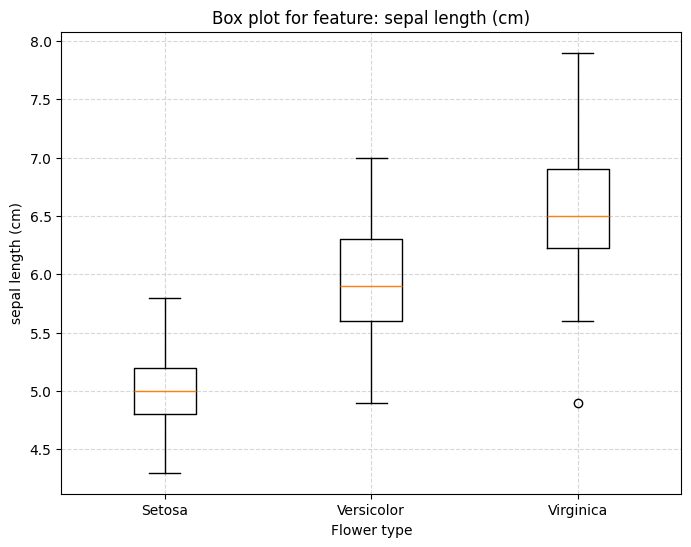

/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/2391068177.py:17: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



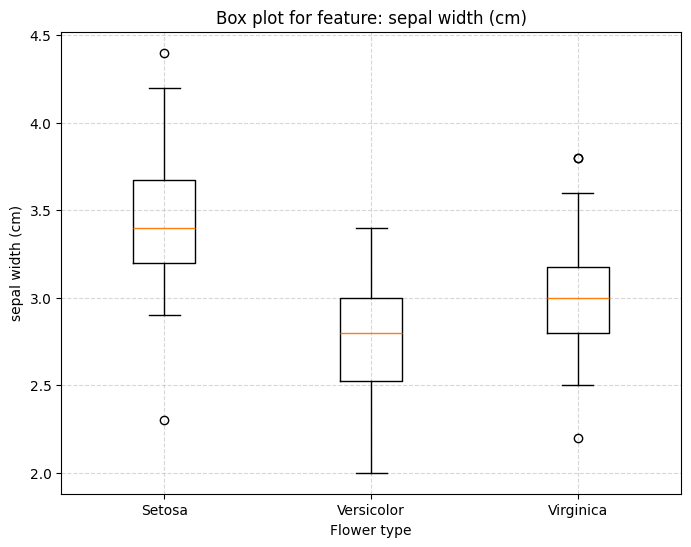

/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/2391068177.py:17: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



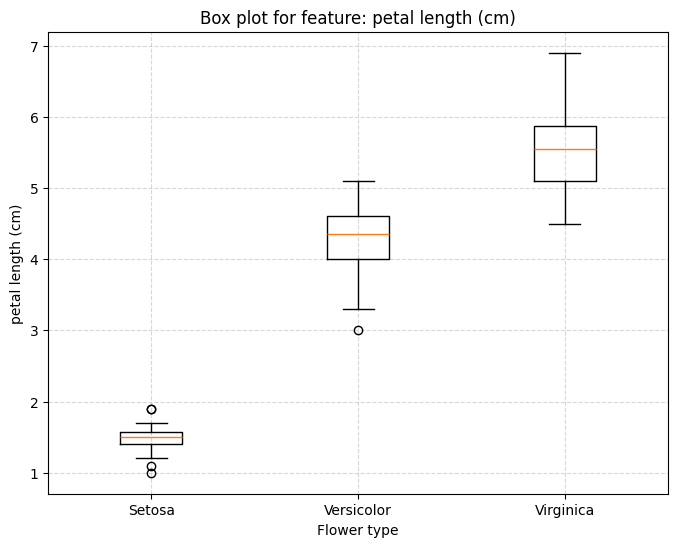

/var/folders/xm/86fhz4bs1l371nsyjfr2hk880000gn/T/ipykernel_43566/2391068177.py:17: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



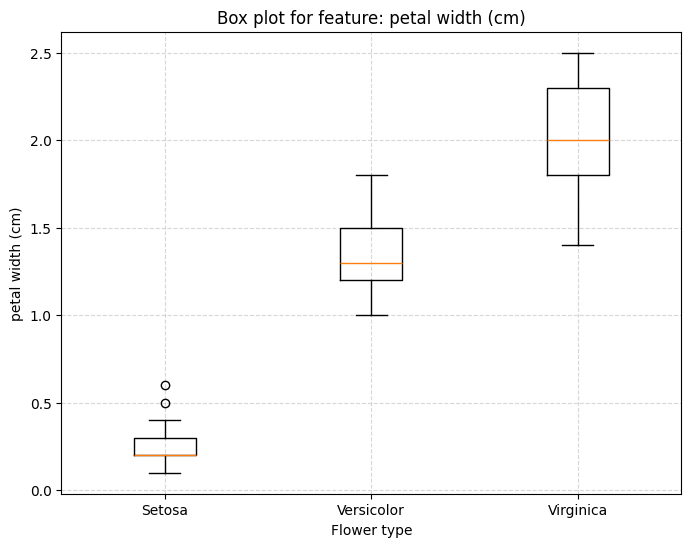

In [14]:
features_list = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
]


for feature in features_list:

    fig, ax = plt.subplots(figsize=(8, 6))

    target_cat = master_data["target_str"].unique()

    data = [master_data[master_data["target_str"]==category][feature]for category in target_cat]

    ax.boxplot(data, labels=target_cat)

    ax.set_title(f"Box plot for feature: {feature}")
    ax.set_xlabel("Flower type")
    ax.set_ylabel(feature)

    ax.grid(visible=True, linestyle="--", alpha=0.5)

    plt.show()

In [15]:
train_obj = modelTraining()

train_data = master_data.drop(columns=["target_str"])

eval_dict = train_obj.model_training(data_df=train_data)
eval_dict

{'accuracy': 0.9,
 'f1': np.float64(0.8935574229691877),
 'precision': np.float64(0.8977272727272728),
 'recall': np.float64(0.8925925925925925)}